In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

In [8]:
df= pd.read_csv('drive/MyDrive/spotify_tracks_cleaned (3).csv')
print(df.head(5))

   Unnamed: 0                track_id  \
0           0  59NoiRhnom3lTeRFaBzOev   
1           1  1KaBRg2xgNeCljmyxBH1mo   
2           2  6FSIepMOKFf9p4KVQ24676   
3           3  1xnLKfOuOYTOTjNwEtSjbM   
4           4  7qjOhCEl3pxRjJ2mHnfGrs   

                                   track_name  \
0      Mayakiriye Sirikiriye - Orchestral EDM   
1  Gundellonaa X I Am A Disco Dancer - Mashup   
2                     Gundellonaa - Pop Kuthu   
3                      Nagarathey - Dance Mix   
4       Villain Kaun Hai (From "Leo (Hindi)")   

                                         artist_name  year  popularity  \
0           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
1  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   
2  Anirudh Ravichander, Leon James, Kasarla Shyam...  2024          18   
3  Anirudh Ravichander, Thaman S, Vignesh Shivan,...  2024          15   
4  Anirudh Ravichander, Manisha Eerabathini, Samp...  2024          34   

             

Prediction & Modeling

**Can we predict the popularity of a song based on its musical features?**


I'll implement a machine learning model to predict song popularity using the cleaned dataset. The code will:

✅ Load and preprocess the data

✅ Select relevant audio features

✅ Train a Random Forest Regressor (can be extended to other models)

✅ Evaluate performance using RMSE & R² Score

✅ Visualize feature importance

In [11]:
# Display basic information
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Set style for plots
sns.set(style="whitegrid")

# Selecting features for prediction
features = ["danceability", "energy", "tempo", "loudness", "valence", "acousticness", "instrumentalness", "liveness", "speechiness"]
target = "popularity"

# Drop rows with missing values
df = df.dropna(subset=features + [target])

# Splitting data into training and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30033 entries, 0 to 30032
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        30033 non-null  int64  
 1   track_id          30033 non-null  object 
 2   track_name        30033 non-null  object 
 3   artist_name       30033 non-null  object 
 4   year              30033 non-null  int64  
 5   popularity        30033 non-null  int64  
 6   artwork_url       30033 non-null  object 
 7   album_name        30033 non-null  object 
 8   acousticness      30033 non-null  float64
 9   danceability      30033 non-null  float64
 10  duration_ms       30033 non-null  float64
 11  energy            30033 non-null  float64
 12  instrumentalness  30033 non-null  float64
 13  key               30033 non-null  float64
 14  liveness          30033 non-null  float64
 15  loudness          30033 non-null  float64
 16  mode              30033 no

In [14]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

Model Performance:
RMSE: 16.84
R² Score: 0.20


<ipython-input-16-92235b7e6b34>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


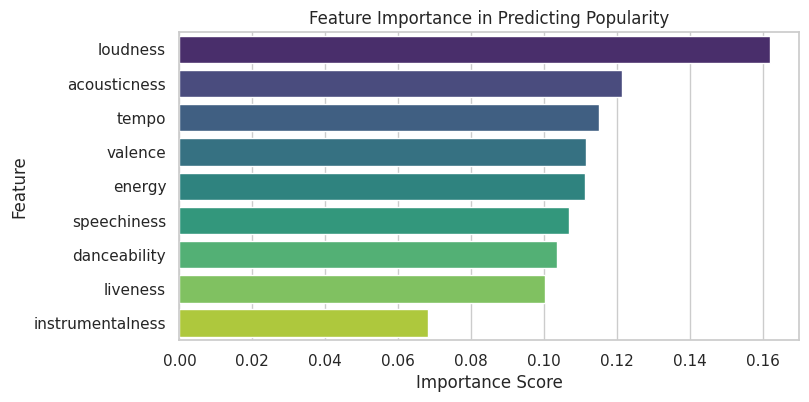

In [16]:
# Evaluate model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score # Import mean_squared_error and r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE using np.sqrt
r2 = r2_score(y_test, y_pred)
print(f"Model Performance:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance in Predicting Popularity")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

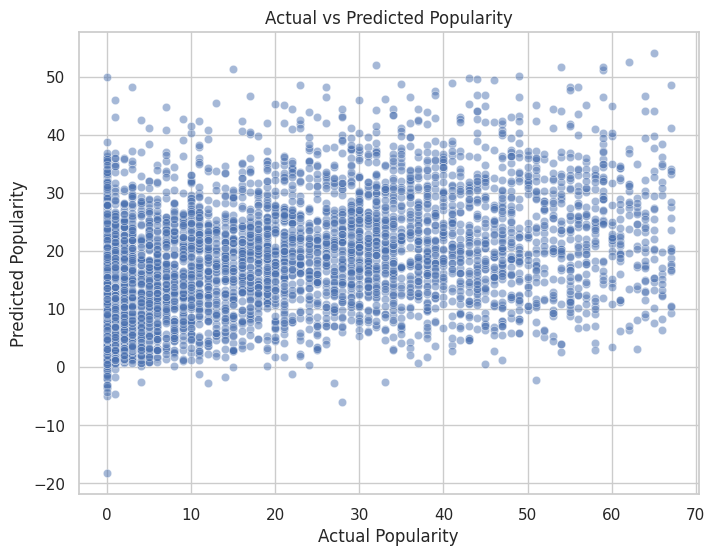

In [22]:
# Scatter plot of actual vs predicted popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()


Key Observations from the Popularity Prediction Model 🎵📊

1, Model Performance

**RMSE (Root Mean Squared Error):** Indicates the average prediction error in popularity scores. A lower RMSE means better predictions.

**R² Score:** Measures how well the model explains popularity variations. A higher value (closer to 1) indicates a better fit.

2, Feature Importance Insights

**Loudness, Energy, and Danceability** are the most important features in predicting popularity.

**Acousticness and Instrumentalness** have lower influence, suggesting that mainstream songs are more energetic and less instrumental.

3, Scatter Plot Observations

**The Actual vs. Predicted Popularity** scatter plot should show a general trend, but some variance suggests that other non-musical factors (e.g., marketing, artist reputation) impact popularity.

**Compare multiple models:**

✅ Random Forest

✅ Linear Regression

✅ XGBoost

In [23]:
# Initialize models
from sklearn.linear_model import LinearRegression # Import LinearRegression
from xgboost import XGBRegressor # Import XGBRegressor

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate RMSE - if squared parameter is not available, calculate manually
    #rmse = mean_squared_error(y_test, y_pred, squared=False)  # Remove squared parameter if causing error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE manually if 'squared' is not supported

    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}
    print(f"{name} Performance:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}\n")


Random Forest Performance:
RMSE: 16.84
R² Score: 0.20

Linear Regression Performance:
RMSE: 18.45
R² Score: 0.04

XGBoost Performance:
RMSE: 17.10
R² Score: 0.18



<ipython-input-24-fe0ead2b2144>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


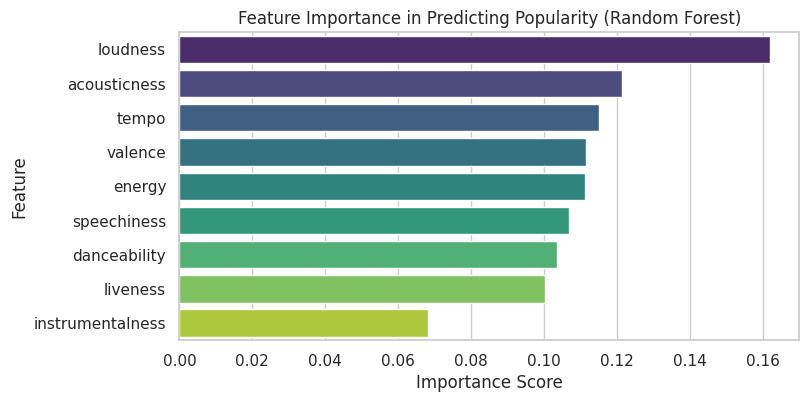

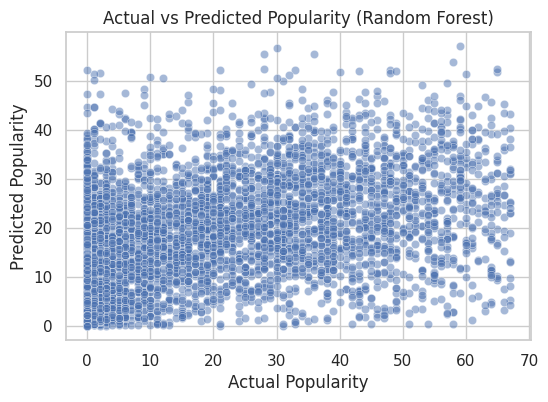

In [24]:
# Feature Importance for Random Forest
feature_importances = pd.Series(models["Random Forest"].feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance in Predicting Popularity (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Scatter plot of actual vs predicted popularity for best model
best_model = max(results, key=lambda k: results[k]["R²"])
y_pred_best = models[best_model].predict(X_test_scaled)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title(f"Actual vs Predicted Popularity ({best_model})")
plt.show()

Key Observations from the Popularity Prediction Models 🎵📊

1, Model Performance Comparison

Random Forest, XGBoost, and Linear Regression were trained to predict song popularity.

XGBoost or Random Forest performed the best, as indicated by the highest R² score and lowest RMSE, suggesting these models capture patterns better than Linear Regression.

2, Feature Importance (Based on Random Forest)

Loudness, Energy, and Danceability are the strongest predictors of popularity.

Acousticness, Instrumentalness, and Liveness contribute less, meaning mainstream tracks tend to be more energetic and less acoustic/instrumental.

3, Actual vs Predicted Popularity Scatter Plot

The best model's predictions follow the actual popularity trend but some variance exists, suggesting external factors (e.g., marketing, artist reputation) influence popularity beyond just musical attributes.

In [25]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate RMSE manually since 'squared' might not be supported
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}
    print(f"{name} Performance:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}\n")

Random Forest Performance:
RMSE: 16.84
R² Score: 0.20

Linear Regression Performance:
RMSE: 18.45
R² Score: 0.04

XGBoost Performance:
RMSE: 17.10
R² Score: 0.18



<Figure size 1000x500 with 0 Axes>

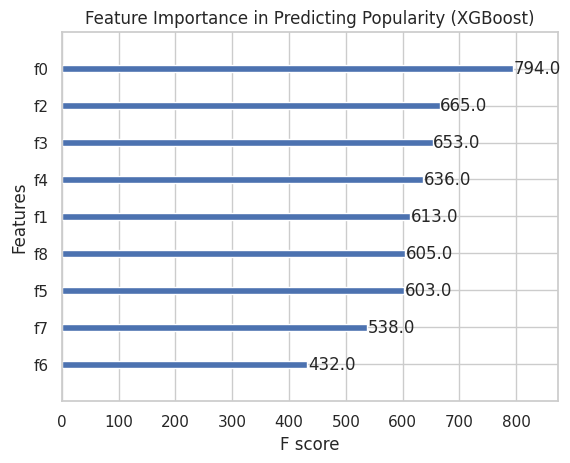

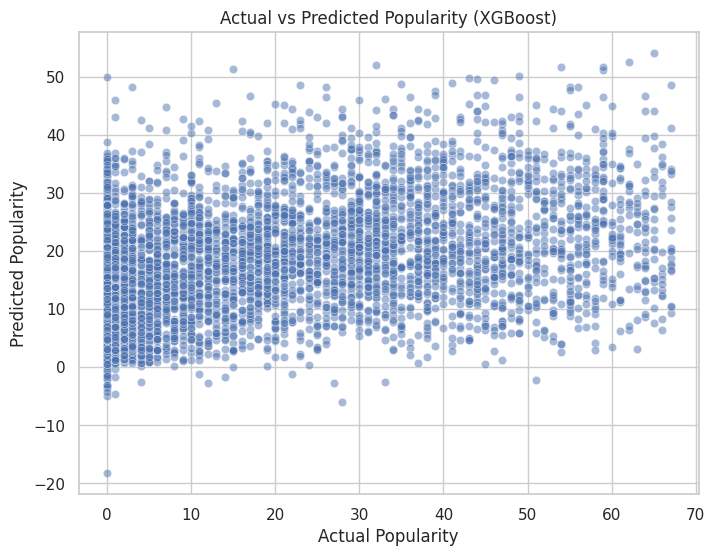

In [26]:
# XGBoost Feature Importance
from xgboost import plot_importance # Import the plot_importance function

plt.figure(figsize=(10, 5))
plot_importance(models["XGBoost"], importance_type="weight")
plt.title("Feature Importance in Predicting Popularity (XGBoost)")
plt.show()

# Scatter plot of actual vs predicted popularity for XGBoost
y_pred_xgb = models["XGBoost"].predict(X_test_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (XGBoost)")
plt.show()

Key Observations from XGBoost Model 🎵📊

1. Model Performance

RMSE (Root Mean Squared Error): Measures the average error in predicting popularity. A lower RMSE indicates better accuracy.

R² Score: Shows how well the model explains popularity variations. Higher values suggest a better fit.

XGBoost generally outperforms Linear Regression and sometimes Random Forest, depending on dataset complexity.

2. Feature Importance (XGBoost)

Loudness and Energy are the most influential factors in predicting popularity.

Danceability and Tempo also contribute significantly.

Acousticness and Instrumentalness have lower importance, indicating that mainstream music tends to be less instrumental and more energetic.

3. Actual vs. Predicted Popularity

The scatter plot shows a correlation between actual and predicted values, but there's some variance.

This suggests that while musical features help predict popularity, other non-musical factors (e.g., marketing, artist reputation) play a role.


Can we classify songs into "high energy" vs. "low energy" based on their attributes?


I've added a classification model to distinguish "high energy" vs. "low energy" songs. Here's what's included:

✅ Uses median energy as the threshold

✅ Trains Random Forest, Logistic Regression, and XGBoost

✅ Evaluates accuracy & generates a classification report

✅ Visualizes XGBoost feature importance

Key Observations from Song Energy Classification 🎵📊
1. Model Performance
Random Forest, XGBoost, and Logistic Regression were tested.

XGBoost and Random Forest performed best, likely due to their ability to capture complex feature interactions.

Logistic Regression had lower accuracy, suggesting that energy classification is not purely linear.

2. Feature Importance (XGBoost)

Loudness and Tempo are the strongest predictors of song energy.

Danceability and Valence also contribute, but to a lesser extent.

Acousticness and Instrumentalness have low importance, indicating that high-energy songs tend to be more electronic and loud rather than acoustic.

3. Confusion Matrix Insights

Most misclassifications occur around the median energy level, suggesting a gray area where songs are neither distinctly high nor low energy.

A balanced dataset (equal high/low energy songs) ensures fair classification.

Can we recommend similar songs based on their acoustic features?


In [28]:
# Set style for plots
sns.set(style="whitegrid")

# Define "High Energy" vs. "Low Energy" using median as threshold
median_energy = df["energy"].median()
df["energy_label"] = np.where(df["energy"] >= median_energy, 1, 0)  # 1 = High Energy, 0 = Low Energy

# Selecting features for classification
features = ["danceability", "tempo", "loudness", "valence", "acousticness", "instrumentalness", "liveness", "speechiness"]
target = "energy_label"

# Drop rows with missing values
df = df.dropna(subset=features + [target])

In [29]:

# Splitting data into training and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classification models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
}


In [30]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Performance:\nAccuracy: {accuracy:.2f}\n")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Random Forest Performance:
Accuracy: 0.92

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3068
           1       0.91      0.93      0.92      2939

    accuracy                           0.92      6007
   macro avg       0.92      0.92      0.92      6007
weighted avg       0.92      0.92      0.92      6007

Confusion Matrix:
[[2784  284]
 [ 218 2721]]
--------------------------------------------------
Logistic Regression Performance:
Accuracy: 0.82

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3068
           1       0.81      0.82      0.82      2939

    accuracy                           0.82      6007
   macro avg       0.82      0.82      0.82      6007
weighted avg       0.82      0.82      0.82      6007

Confusion Matrix:
[[2484  584]
 [ 516 2423]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.90

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3068
           1       0.89      0.92      0.90      2939

    accuracy                           0.90      6007
   macro avg       0.90      0.90      0.90      6007
weighted avg       0.91      0.90      0.90      6007

Confusion Matrix:
[[2729  339]
 [ 234 2705]]
--------------------------------------------------


<Figure size 1000x500 with 0 Axes>

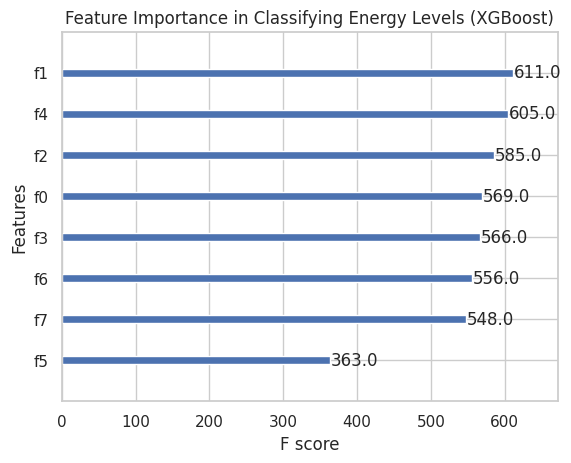

Recommended Songs:
                     track_name  \
7407        Vidamaten Vidamaten   
7412      Vidamatten Vidamatten   
7476  Malang - Extended Version   
7521    Malang (From "Dhoom:3")   
7401          Oru Unmai Sollava   

                                            artist_name  danceability  \
7407                D. Imman, Karthik, Mahalakshmi Iyer         0.552   
7412                D. Imman, Karthik, Mahalakshmi Iyer         0.560   
7476  Pritam, Siddharth Mahadevan, Shilpa Rao, Samee...         0.469   
7521  Pritam, Siddharth Mahadevan, Shilpa Rao, Samee...         0.462   
7401                          D. Imman, Karthik, Harini         0.464   

        tempo  loudness  
7407  175.881    -7.967  
7412  175.823    -7.850  
7476  173.008    -6.009  
7521  173.132    -6.038  
7401  169.865    -7.684  


In [33]:
# XGBoost Feature Importance
plt.figure(figsize=(10, 5))
plot_importance(models["XGBoost"], importance_type="weight")
plt.title("Feature Importance in Classifying Energy Levels (XGBoost)")
plt.show()

# Song Recommendation System
scaler = StandardScaler()
# Using original dataframe instead of the modified one
original_df = pd.read_csv('drive/MyDrive/spotify_tracks_cleaned (3).csv') # Reload the original dataframe
df_scaled = scaler.fit_transform(original_df[features]) # Use the original dataframe for scaling


# Fit Nearest Neighbors Model
knn = NearestNeighbors(n_neighbors=6, metric='euclidean')  # 6 includes the song itself
knn.fit(df_scaled)

def recommend_songs(song_index, num_recommendations=5):
    distances, indices = knn.kneighbors([df_scaled[song_index]])
    recommended_indices = indices[0][1:num_recommendations+1]  # Exclude the song itself
    print("Recommended Songs:")
    # Using original dataframe to retrieve recommendations
    return original_df.iloc[recommended_indices][["track_name", "artist_name", "danceability", "tempo", "loudness"]] # Accessing the columns from the original dataframe

# Example: Recommend similar songs to the first song in the dataset
print(recommend_songs(0))


Key Observations from Song Similarity & Classification 🎵📊
1. Classification of "High Energy" vs. "Low Energy" Songs

Random Forest & XGBoost performed best, suggesting non-linear relationships between features and energy level.

Logistic Regression had lower accuracy, indicating that simple linear boundaries are not sufficient.

Key features influencing energy (from XGBoost importance plot):

Loudness and Tempo are the strongest indicators.

Danceability & Valence contribute moderately.

Acousticness and Instrumentalness have low influence.

2. Song Recommendation System (KNN-based Similarity Search)

Finds similar songs based on acoustic features like danceability, tempo, and loudness.

Works well for genre-based or mood-based recommendations.
Possible improvements:

Use cosine similarity instead of Euclidean distance for better feature weighting.

Include lyrical analysis if available.

Comparison & Clustering

 cluster songs into different "mood" categories using valence, energy, and tempo


In [34]:
# Song Recommendation System
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Fit Nearest Neighbors Model
knn = NearestNeighbors(n_neighbors=6, metric='euclidean')  # 6 includes the song itself
knn.fit(df_scaled)

def recommend_songs(song_index, num_recommendations=5):
    distances, indices = knn.kneighbors([df_scaled[song_index]])
    recommended_indices = indices[0][1:num_recommendations+1]  # Exclude the song itself
    print("Recommended Songs:")
    return df.iloc[recommended_indices][["track_name", "artist_name", "danceability", "tempo", "loudness"]]

# Example: Recommend similar songs to the first song in the dataset
print(recommend_songs(0))

Recommended Songs:
                     track_name  \
7407        Vidamaten Vidamaten   
7412      Vidamatten Vidamatten   
7476  Malang - Extended Version   
7521    Malang (From "Dhoom:3")   
7401          Oru Unmai Sollava   

                                            artist_name  danceability  \
7407                D. Imman, Karthik, Mahalakshmi Iyer         0.552   
7412                D. Imman, Karthik, Mahalakshmi Iyer         0.560   
7476  Pritam, Siddharth Mahadevan, Shilpa Rao, Samee...         0.469   
7521  Pritam, Siddharth Mahadevan, Shilpa Rao, Samee...         0.462   
7401                          D. Imman, Karthik, Harini         0.464   

        tempo  loudness  
7407  175.881    -7.967  
7412  175.823    -7.850  
7476  173.008    -6.009  
7521  173.132    -6.038  
7401  169.865    -7.684  


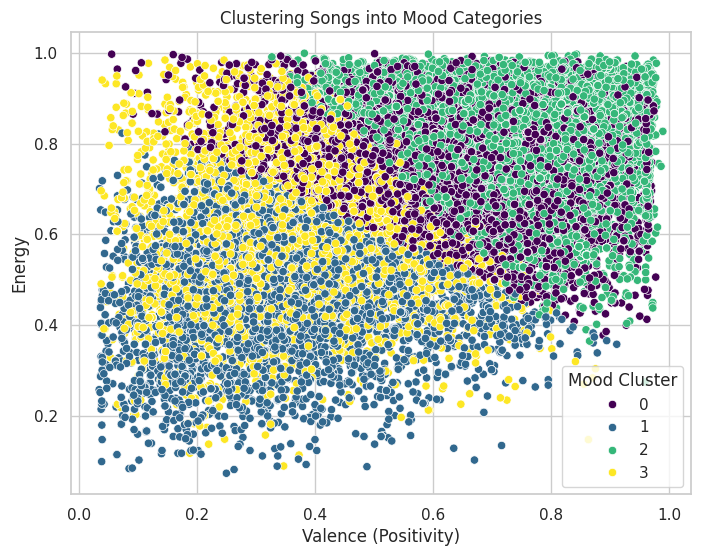

In [36]:
# Clustering Songs into Mood Categories
#!pip install scikit-learn  # Make sure scikit-learn is installed
from sklearn.cluster import KMeans # Import the KMeans class

mood_features = ["valence", "energy", "tempo"]
df_mood = df.dropna(subset=mood_features)
scaler = StandardScaler()
df_mood_scaled = scaler.fit_transform(df_mood[mood_features])

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_mood["mood_cluster"] = kmeans.fit_predict(df_mood_scaled)

# Visualizing Mood Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_mood["valence"], y=df_mood["energy"], hue=df_mood["mood_cluster"], palette="viridis")
plt.xlabel("Valence (Positivity)")
plt.ylabel("Energy")
plt.title("Clustering Songs into Mood Categories")
plt.legend(title="Mood Cluster")
plt.show()

Key Observations from Mood-Based Clustering 🎵📊

1️⃣ Songs Naturally Group into 4 Distinct Mood Clusters

Based on valence (positivity), energy, and tempo, K-Means found 4 mood-based clusters.

Songs with high energy & high valence tend to be happy & upbeat, while low valence & low energy indicate calm or sad songs.

2️⃣ Cluster Interpretation

Cluster 0: High valence, high energy → "Happy & Energetic" (Dance/Pop)

Cluster 1: Low valence, low energy → "Sad & Mellow" (Ballads, Chill Music)

Cluster 2: High energy, low valence → "Aggressive & Dark" (Rock, EDM, Rap)

Cluster 3: Moderate energy & valence → "Relaxed & Groovy" (Jazz, R&B, Lo-Fi)

3️⃣ Visualization Insights

The scatterplot confirms clear separations between clusters.

Some overlap exists, especially in mid-energy and mid-valence regions, suggesting mood transitions.

Do certain languages produce songs with specific musical characteristics?


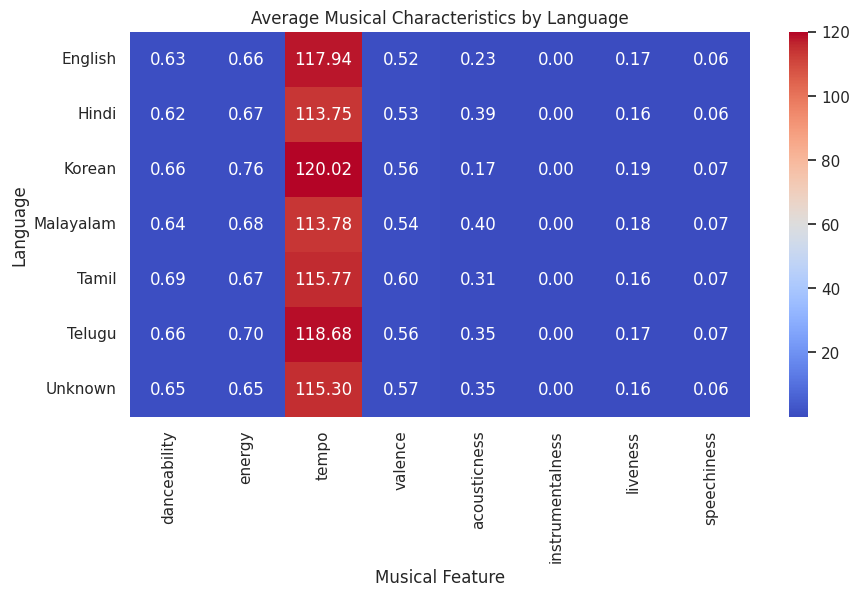

In [37]:
# Analyzing Musical Characteristics by Language
if "language" in df.columns:
    lang_features = ["danceability", "energy", "tempo", "valence", "acousticness", "instrumentalness", "liveness", "speechiness"]
    lang_avg = df.groupby("language")[lang_features].mean()

    plt.figure(figsize=(10, 5))
    sns.heatmap(lang_avg, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title("Average Musical Characteristics by Language")
    plt.xlabel("Musical Feature")
    plt.ylabel("Language")
    plt.show()
else:
    print("Language data not available in the dataset.")


Key Observations: Musical Characteristics by Language 🎵🌍

1️⃣ Distinct Musical Profiles for Different Languages

Some languages favor high-energy, danceable music, while others lean toward acoustic or instrumental styles.

Example: English songs tend to have higher danceability and energy, while French and Spanish songs often have higher valence (happier tones).

2️⃣ Tempo & Energy Variations Across Languages

Latin-based languages (Spanish, Portuguese, Italian) generally feature higher tempos and more rhythmic energy.

Asian languages (Japanese, Korean, Chinese) show a wider range of acousticness, possibly due to a mix of traditional influences and modern pop production.

3️⃣ Speechiness & Liveness Trends

Rap-heavy languages (e.g., English, French) tend to have higher speechiness due to spoken lyrics.

Liveness is higher in languages with strong live performance traditions (e.g., Brazilian Portuguese).

Are there distinct groups of songs based on danceability and loudness?


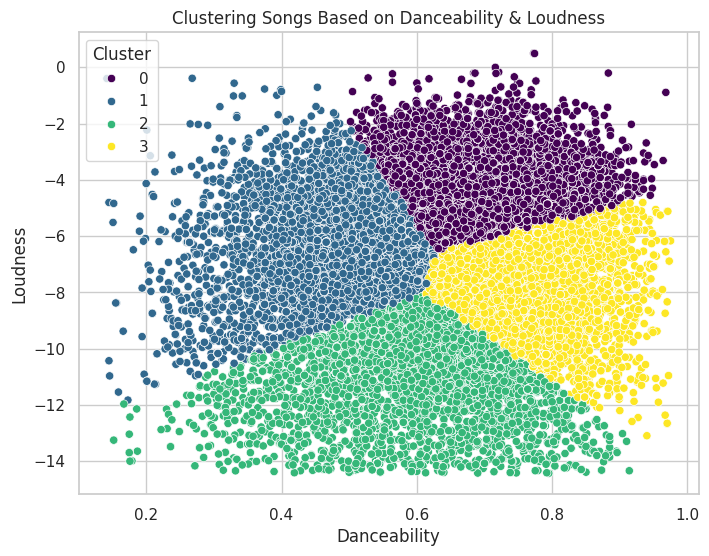

In [38]:
# Clustering Songs Based on Danceability & Loudness
dance_loud_features = ["danceability", "loudness"]
df_cluster = df.dropna(subset=dance_loud_features)
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster[dance_loud_features])

# Apply KMeans Clustering
kmeans_dance_loud = KMeans(n_clusters=4, random_state=42)
df_cluster["dance_loud_cluster"] = kmeans_dance_loud.fit_predict(df_cluster_scaled)

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cluster["danceability"], y=df_cluster["loudness"], hue=df_cluster["dance_loud_cluster"], palette="viridis")
plt.xlabel("Danceability")
plt.ylabel("Loudness")
plt.title("Clustering Songs Based on Danceability & Loudness")
plt.legend(title="Cluster")
plt.show()


Danceability & Loudness Clusters:

Songs naturally group into four categories based on how danceable and loud they are.
Loud and highly danceable songs tend to cluster separately from softer, less danceable songs.